# Create (Annually) English and Finnish Word Clouds
Update: 07.04.2021<br>
Mai Vu

In [1]:
#Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

#Libraries for lemmatization
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from libvoikko import Voikko #For Finnish

#Libraries for word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

## 1. Read the data

In [2]:
eng_data = pd.read_csv('eng_theseus_abstract.csv')
fin_data = pd.read_csv('fin_theseus_abstract.csv')

In [3]:
eng_data.sample(5)

,date,abstract_en,title,annif_keywords_en
10064,2010,The increasing competition in the telecommunic...,Exploring Cost Reduction Options for On-Going ...,"['business processes', 'enterprises', 'busines..."
9948,2020,CAS Software AG is a mid-sized Software compan...,Automated Jira Data Analysis for Optimised Pro...,"['projects', 'project management', 'project ma..."
11274,2018,The internet has presented corporate communica...,Videos for the online environment,"['enterprises', 'Internet', 'communication', '..."
9044,2018,This thesis work is made for Wärtsilä Services...,Project Sales Cost Calculation Tool : Case: Wä...,"['costs', 'projects', 'sales', 'energy sector'..."
5310,2015,The aim of this master’s thesis was to study a...,Wireless Connectivity Study : Wireless Connect...,"['monitoring devices', 'technology', 'civil en..."


In [4]:
fin_data.sample(5)

,date,abstract_fi,title,annif_keywords_fi
90396,2017,Tämän opinnäytetyön tarkoituksena oli määrittä...,Sähkö- ja automaatiosuunnittelun tietokantapoh...,"['tietokoneohjelmat', 'tietokannat', 'esitysgr..."
665,2009,Tämä kehittämistyö on osa Laurea-ammattikorkea...,Turvallinen lääkehoito Nummentaustan kotihoido...,"['kehittäminen', 'osaaminen', 'ammattitaito', ..."
71882,2016,Clostridium difficile on itiöitä muodostava su...,Illumigenestä GenomEraan : Clostridium diffici...,"['bakteerit', 'Clostridium difficile', 'diagno..."
83100,2017,Tampereen ammattikorkeakoulu ja Tampereen Työv...,Työharjoittelu musikaalissa : Spring Awakening...,"['musikaalit', 'Tampere', 'ammattikorkeakoulut..."
69472,2015,Insinöörityö luo katsauksen infra-alaa parasta...,Tietomallipohjainen koneohjaus infratyömaalla,"['rakentaminen', 'rakennusala', 'laadunvarmist..."


## 2. English Word Cloud

In [5]:
def WordCloudEng(data, stopwords, is_big = True):
    """Function to preprocess abstracts, including merging, deleting punctuation, stopwords, and lemmatization
       and return WordCloud object of the given data in English.
    
    Args:
        (DataFrame) data: the data that includes the abstracts.
        (set) stopwords: set of stopwords from NLTK library.
        (bool) is_big: Whether return a big word cloud or a small word cloud.

    Returns:
        (WordCloud): WordCloud object of the given data.
    """
    
    #MERGE ALL ABSTRACTS AND CREATE STOPWRODS DICTIONARY
    text = ''
    text = " ".join(abstract.lower() for abstract in data['abstract_en'])
    stopwords = stopwords.union(set(STOPWORDS))
    
    #LEMMATIZATION
    lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text) #Tokenizing
    tokens = [token for token in tokens if token.isalnum() and token not in stopwords] #Delete punctuation and stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens] #Using lemmatizer from NLTK library
    text = ' '.join([token for token in tokens]) #Put words back in text
    
    #CREATE WORD CLOUD
    if is_big:
        return WordCloud(width = 800, height = 800, max_words = 70, collocations = False).generate(text)
    else:
        return WordCloud(width = 800, height = 800, max_words = 25, collocations = False).generate(text)

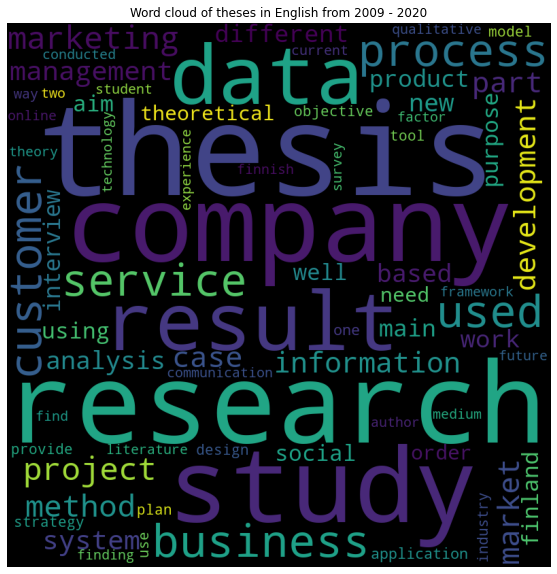

In [6]:
#PLOT THE BIG WORD CLOUD IN ENGLISH 2009 - 2020
wordcloud = WordCloudEng(eng_data, set(stopwords.words('english')))
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.title('Word cloud of theses in English from 2009 - 2020')
plt.axis("off")
plt.show()

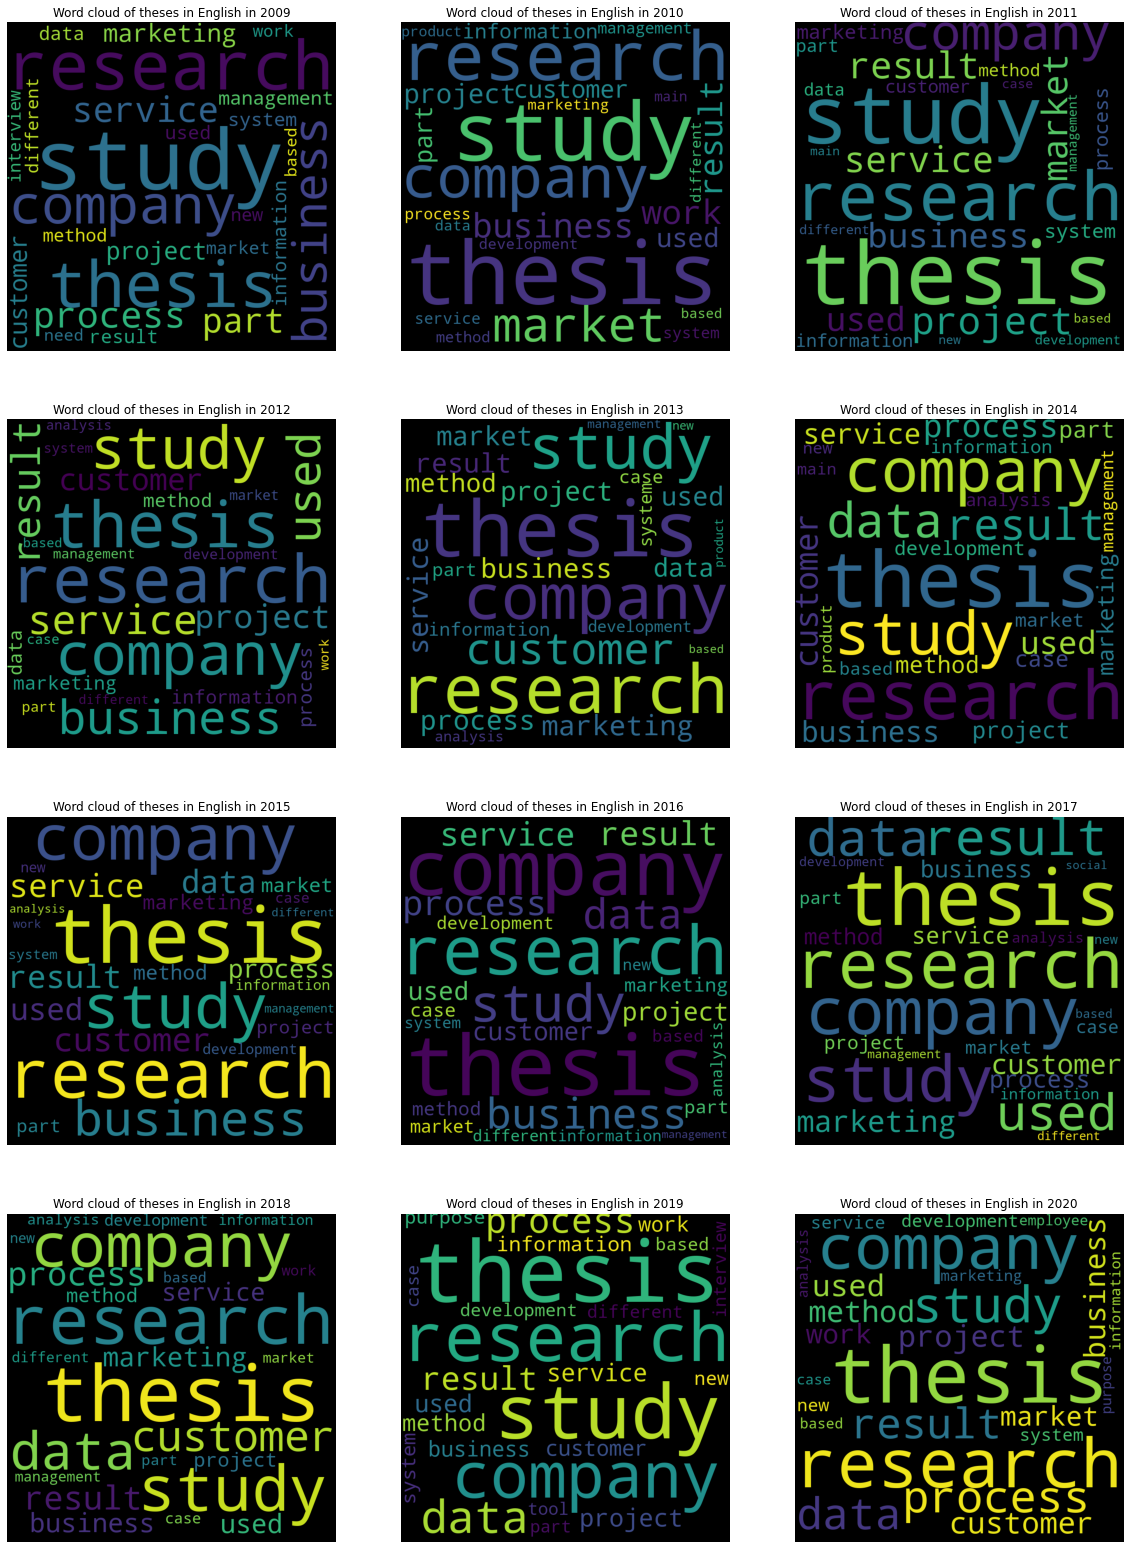

In [7]:
#PLOT ANNUALLY WORD CLOUD IN ENGLISH FROM 2009 - 2020
plt.figure(figsize = (20, 28))
for i in range(2009, 2021):
    wordcloud = WordCloudEng(eng_data.loc[eng_data['date'] == i], set(stopwords.words('english')), False)
    plt.subplot(4, 3, i - 2008, aspect = 'equal')
    plt.imshow(wordcloud)
    plt.title('Word cloud of theses in English in ' + str(i))
    plt.axis("off")
plt.show()

## 3. Finnish Word Cloud

In [8]:
def WordCloudFin(data, stopwords, is_big = True):
    """Function to preprocess abstracts, including merging, deleting punctuation, stopwords, and lemmatization
       and return WordCloud object of the given data in Finnish.
    
    Args:
        (DataFrame) data: the data that includes the abstracts.
        (set) stopwords: set of stopwords from NLTK library.
        (bool) is_big: Whether return a big word cloud or a small word cloud.

    Returns:
        (WordCloud): WordCloud object of the given data.
    """
    
    #MERGE ALL ABSTRACTS AND CREATE STOPWRODS DICTIONARY
    text = ''
    text = " ".join(abstract.lower() for abstract in data['abstract_fi'])
    #stopwords = stopwords.union(set(STOPWORDS))
    
    #LEMMATIZATION
    #lemmatizer = WordNetLemmatizer()
    tokens = nltk.word_tokenize(text) #Tokenizing
    tokens = [token for token in tokens if token.isalnum() and token not in stopwords] #Delete punctuation and stopwords
    #tokens = [lemmatizer.lemmatize(token) for token in tokens] #Using lemmatizer from NLTK library
    text = ' '.join([token for token in tokens]) #Put words back in text
    
    #CREATE WORD CLOUD  
    if is_big:
        return WordCloud(width = 800, height = 800, max_words = 70, collocations = False).generate(text)
    else:
        return WordCloud(width = 800, height = 800, max_words = 25, collocations = False).generate(text)

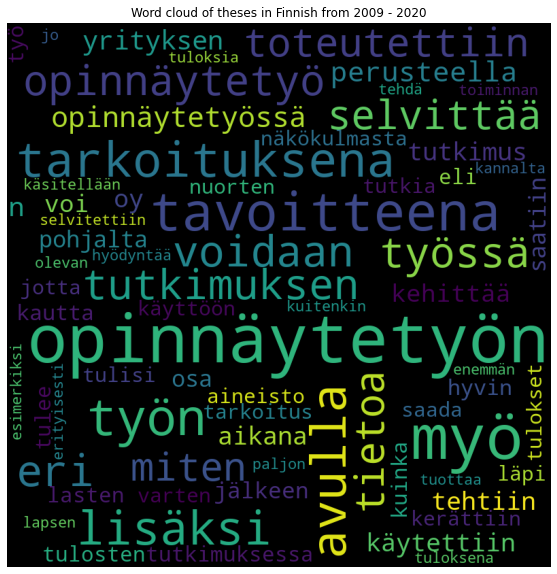

In [9]:
#PLOT THE BIG WORD CLOUD IN ENGLISH 2009 - 2020
wordcloud = WordCloudFin(fin_data, set(stopwords.words('finnish')))
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.title('Word cloud of theses in Finnish from 2009 - 2020')
plt.axis("off")
plt.show()

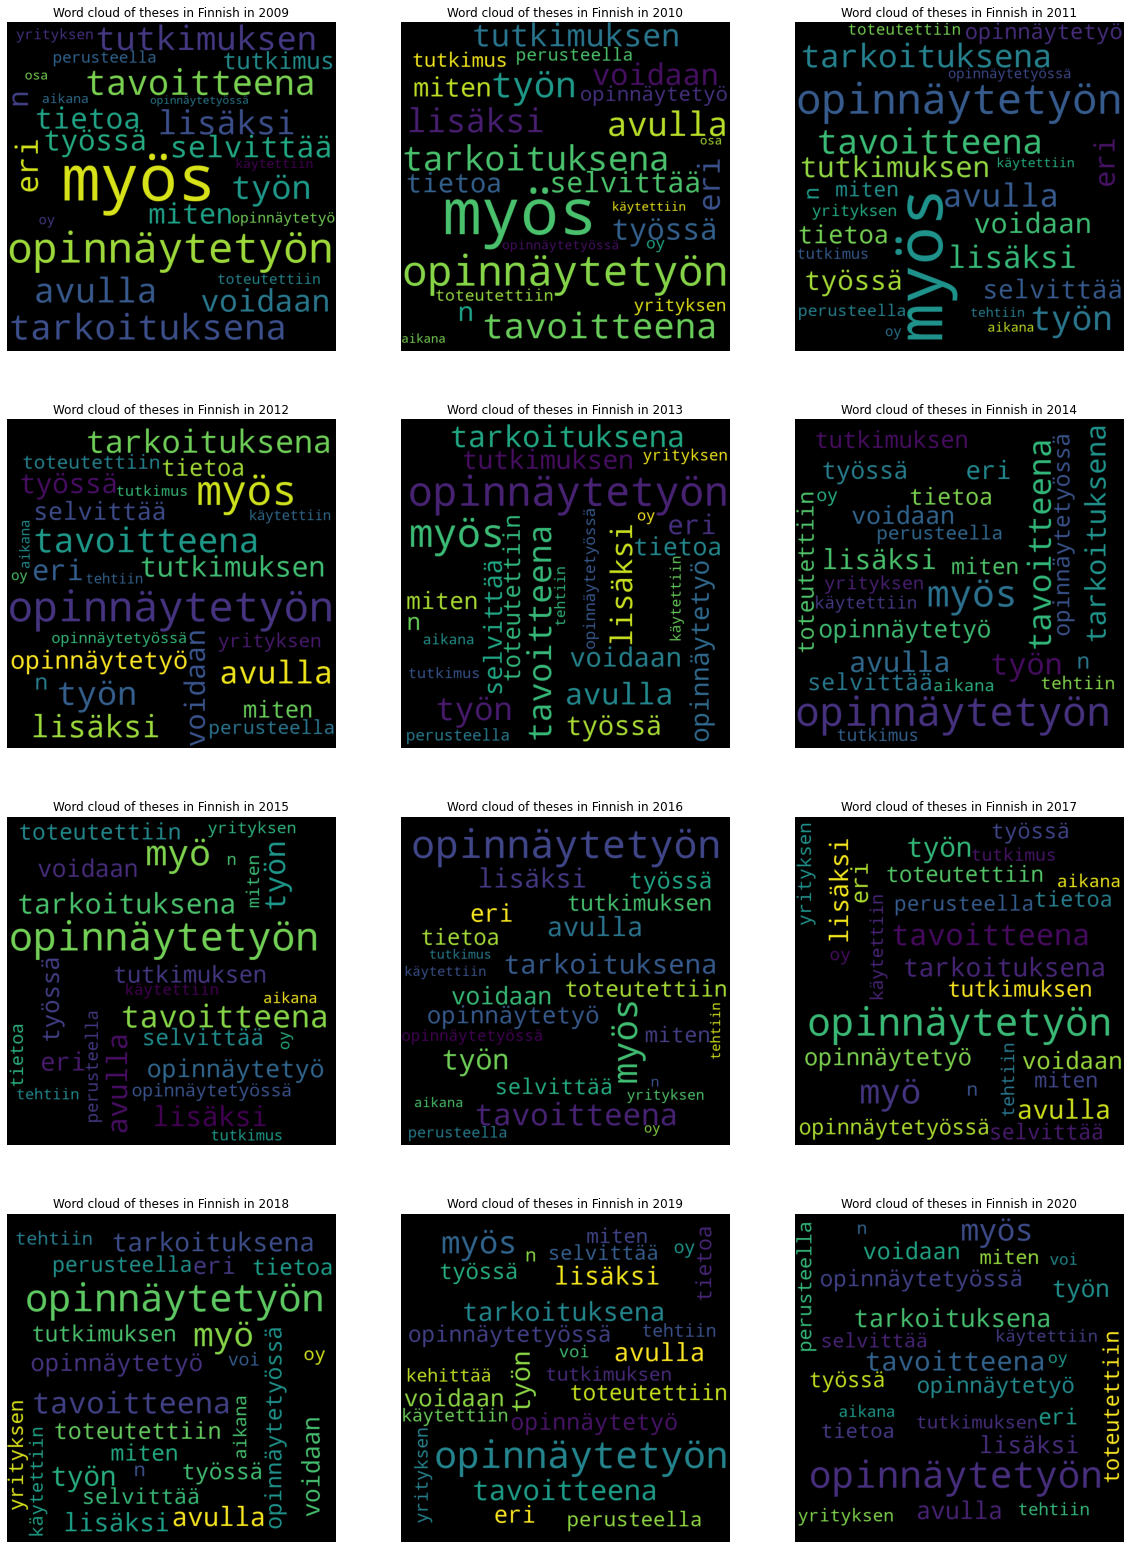

In [10]:
#PLOT ANNUALLY WORD CLOUD IN FINNISH FROM 2009 - 2020
plt.figure(figsize = (20, 28))
for i in range(2009, 2021):
    wordcloud = WordCloudFin(fin_data.loc[fin_data['date'] == i], set(stopwords.words('finnish')), False)
    plt.subplot(4, 3, i - 2008, aspect = 'equal')
    plt.imshow(wordcloud)
    plt.title('Word cloud of theses in Finnish in ' + str(i))
    plt.axis("off") 
plt.show()